# Предобработка данных метилирования генома человека

**Эта тетрадка выложена только для ознакомления, код не выполнится поскольку сырые данные не хранятся на этом диске. Но если вы захотите воспроизвести или изменить предобработку, то вы можете скачать эту тетрадку и сырые данные на локальную машину и прописать пути к соответствующим файлам, тогда все будет работать.**

## Описание данных

Датасет с данными о метилировании ДНК GSE87571 в 476 366 сайтах распо по всему геному белых кровяных телец из когорты населения (N = 421) в возрасте от 14 до 94 лет, количество образцов составляет 732.

Адрес датасета на сайте GEO
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87571

In [ ]:
import time
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
try:
    path_main_dir = r"C:\Users\IvanovNikita"\
                    
except:    
    raise Exception('Задайте путь к корневой папке с файлами')

## Загрузка данных с уровнями метилирования в CG-islands

In [ ]:
# Загрузим матрицы значений 
data_1 = pd.read_csv(path_main_dir+'\\raw_data\\GSE87571_matrix1of2.txt',
                     sep='	')

In [ ]:
data_2 = pd.read_csv(path_main_dir+'\\raw_data\\GSE87571_matrix2of2.txt',
                     sep='	')

In [ ]:
# Установим в качестве индексов
data_2 = data_2.set_index(
    'ID_REF',
    drop = True)

In [ ]:
data_1 = data_1.set_index(
    'ID_REF',
    drop = True)

In [ ]:
data_joined = data_1.join(data_2, how = 'outer')

display(data_joined.shape)
display(data_joined.head())
display(data_joined.tail())

(485512, 1464)

,X1,X1.1,X10,X10.1,X100,X100.1,X101,X101.1,X102,X102.1,...,X95,X95.1,X96,X96.1,X97,X97.1,X98,X98.1,X99,X99.1
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00050873,0.824023,0.0,NaN,0.007851,NaN,0.728088,NaN,0.961830,NaN,0.182184,...,0.829739,0.0,NaN,0.914666,0.832990,0.0,NaN,0.203708,0.852145,0.0
cg00212031,0.031579,0.0,NaN,0.713749,NaN,0.427747,NaN,0.989960,NaN,0.858968,...,0.072655,0.0,NaN,0.658181,0.066660,0.0,NaN,0.883961,0.045496,0.0
cg00213748,0.890866,0.0,NaN,0.383634,NaN,0.267454,NaN,0.878918,NaN,0.866626,...,0.829465,0.0,NaN,0.547537,0.907471,0.0,NaN,0.159364,0.777021,0.0
cg00214611,0.036628,0.0,NaN,0.204428,NaN,0.017967,NaN,0.278137,NaN,0.713628,...,0.039067,0.0,NaN,0.241154,0.032361,0.0,NaN,0.254682,0.012872,0.0
cg00455876,0.776977,0.0,NaN,0.001922,NaN,0.000064,NaN,0.000495,NaN,0.000588,...,0.773916,0.0,NaN,0.000011,0.736907,0.0,NaN,0.000012,0.773452,0.0


,X1,X1.1,X10,X10.1,X100,X100.1,X101,X101.1,X102,X102.1,...,X95,X95.1,X96,X96.1,X97,X97.1,X98,X98.1,X99,X99.1
ID_REF,,,,,,,,,,,,,,,,,,,,,
ch.22.909671F,0.057891,0.0,0.221108,0.0,0.066405,0.0,0.076406,0.0,0.044699,0.0,...,0.115592,0.0,0.054574,0.0,0.096974,0.0,0.092796,0.0,0.088967,0.0
ch.22.46830341F,0.042315,0.0,0.034829,0.0,0.025640,0.0,0.043598,0.0,0.021270,0.0,...,0.031185,0.0,0.029953,0.0,0.034787,0.0,0.078034,0.0,0.053333,0.0
ch.22.1008279F,0.005898,0.0,0.006287,0.0,0.006652,0.0,0.013686,0.0,0.008111,0.0,...,0.008182,0.0,0.011095,0.0,0.003545,0.0,0.021802,0.0,0.017240,0.0
ch.22.47579720R,0.083398,0.0,0.112058,0.0,0.070752,0.0,0.095896,0.0,0.056537,0.0,...,0.080128,0.0,0.072277,0.0,0.070170,0.0,0.091591,0.0,0.086221,0.0
ch.22.48274842R,0.028080,0.0,0.035582,0.0,0.023578,0.0,0.025565,0.0,0.031796,0.0,...,0.034908,0.0,0.028587,0.0,0.031882,0.0,0.032754,0.0,0.033597,0.0


В таблице для каждого столбца X с данными уровней метилирования сайтов CpG пристуствует дополнительный столбец X.1 со значениями вероятности ошибки в распознавании, разделим эти данные и оставим только те сайты метилирования, для которых p-value не больше 0.01 для не менее чем 95% образцов

In [ ]:
# Отделим данные метилирования от значений p-value

p_value_detection = data_joined[[x for x in data_joined.columns if '.' in x]]

data_methylation = data_joined[[x for x in data_joined.columns if '.' not in x]]

In [ ]:
p_value_detection.to_csv(path_main_dir+'\\preprocessed\\p_value_dete')

In [ ]:
data_methylation.to_csv(path_main_dir+'\\preprocessed\\data_methylation.csv')

In [ ]:
# оставим только те сайты метилирования, для которых 
# p-value меньше 0.01 для не менее чем 99% образцов
p_value_thresh_sites = p_value_detection.index\
    [((p_value_detection < 0.01).sum(axis = 1)\
      / p_value_detection.shape[1]) >= 0.99]

p_value_thresh_sites

Index(['cg01707559', 'cg02004872', 'cg02494853', 'cg03244189', 'cg03706273',
       'cg04023335', 'cg04462340', 'cg04792227', 'cg04964672', 'cg05213048',
       ...
       'ch.22.740407F', 'ch.22.757911F', 'ch.22.772318F', 'ch.22.43177094F',
       'ch.22.44116734F', 'ch.22.909671F', 'ch.22.46830341F', 'ch.22.1008279F',
       'ch.22.47579720R', 'ch.22.48274842R'],
      dtype='object', name='ID_REF', length=482878)

In [ ]:
pd.DataFrame(p_value_thresh_sites).to_csv(path_main_dir+'\\preprocessed\\data_methylation.csv')

,ID_REF
0,cg01707559
1,cg02004872
2,cg02494853
3,cg03244189
4,cg03706273
...,...
482873,ch.22.909671F
482874,ch.22.46830341F
482875,ch.22.1008279F
482876,ch.22.47579720R


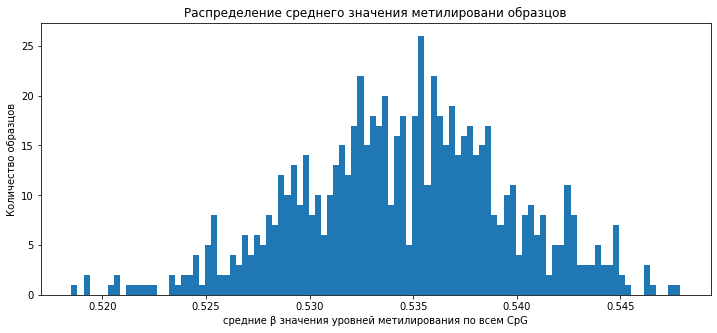

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (12,5))
axes.hist(data_joined.mean(axis=0), bins = 100)
plt.title('Распределение среднего значения метилировани образцов')
axes.set_ylabel('Количество образцов')
axes.set_xlabel('средние β значения уровней метилирования по всем CpG')
plt.show()

In [ ]:
del data_1
del data_2
del data_joined

## Загрузка описаний образцов

In [ ]:
descriptions_samples = pd.read_csv(path_main_dir + '\\GSE87571_series_matrix.txt',
            sep = '\t',
            header = None,
                                   
            lineterminator = '!'
            ).T

In [ ]:
for column in descriptions_samples:
    descriptions_samples[column] = descriptions_samples[column].str.split('\n').str[0]

In [ ]:
descriptions_samples.iloc[:, 0] = descriptions_samples.iloc[:, 0].str.split(' genomic DNA from whole blood').str[0]
descriptions_samples.columns = descriptions_samples.iloc[0, :]
descriptions_samples = descriptions_samples.iloc[1:,:]
descriptions_samples = descriptions_samples.set_index('Sample_title', drop = True)


In [ ]:
descriptions_samples.reset_index()

,Sample_geo_accession,Sample_status,Sample_submission_date,Sample_last_update_date,Sample_type,Sample_channel_count,Sample_source_name_ch1,Sample_organism_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1,...,Sample_contact_address,Sample_contact_city,Sample_contact_state,Sample_contact_zip/postal_code,Sample_contact_country,Sample_supplementary_file,Sample_supplementary_file,Sample_data_row_count,series_matrix_table_begin,series_matrix_table_end
Sample_title,,,,,,,,,,,,,,,,,,,,,
X1,GSM2333901,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 72,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,0,GSM2333901,NaN
X2,GSM2333902,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 55,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,0,GSM2333902,NaN
X3,GSM2333903,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 23,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,0,GSM2333903,NaN
X4,GSM2333904,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 86,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,0,GSM2333904,NaN
X5,GSM2333905,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 74,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2333...,0,GSM2333905,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X728,GSM2334631,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 72,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2334...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2334...,0,GSM2334631,NaN
X729,GSM2334632,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Male,age: 54,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2334...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2334...,0,GSM2334632,NaN
X730,GSM2334633,Public on Oct 04 2016,Oct 03 2016,Oct 04 2016,genomic,1,whole blood,Homo sapiens,gender: Female,age: 52,...,"BMC, Husarg 3",Uppsala,Sweden,75108,Sweden,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2334...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2334...,0,GSM2334633,NaN


In [ ]:
descriptions_samples['Sample_characteristics_ch1']

,Sample_characteristics_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1
Sample_title,,,,
X1,gender: Male,age: 72,tissue: whole blood,disease state: normal
X2,gender: Male,age: 55,tissue: whole blood,disease state: normal
X3,gender: Male,age: 23,tissue: whole blood,disease state: normal
X4,gender: Male,age: 86,tissue: whole blood,disease state: normal
X5,gender: Male,age: 74,tissue: whole blood,disease state: normal
...,...,...,...,...
X728,gender: Male,age: 72,tissue: whole blood,disease state: normal
X729,gender: Male,age: 54,tissue: whole blood,disease state: normal
X730,gender: Female,age: 52,tissue: whole blood,disease state: normal


In [ ]:
gender_age_tissue_state = descriptions_samples.iloc[:, [ 8,  9, 10, 11]]
gender_age_tissue_state.columns = ['sex', 'age', 'tissue', 'disease_state']

In [ ]:
descriptions_samples = descriptions_samples[['Sample_geo_accession']].join(gender_age_tissue_state, how = 'outer')

In [ ]:
descriptions_samples.sex = descriptions_samples.sex.str.split('gender: ').str[1]
descriptions_samples.age = descriptions_samples.age.str.split('age: ').str[1]
descriptions_samples = descriptions_samples.drop(['tissue', 'disease_state'], axis = 1)

In [ ]:
 descriptions_samples = descriptions_samples.dropna(axis = 0, how = 'any')

In [ ]:
descriptions_samples = descriptions_samples[descriptions_samples.age != 'NA']

descriptions_samples.age = descriptions_samples.age.astype('int32')

In [ ]:
descriptions.to_csv(path_main_dir+'\\GSE87571_preprocessed\\sample_descriptions.cvs')

In [ ]:
descriptions = pd.read_csv(path_main_dir\
                           + r"\GSE87571_preprocessed"
                           + r"\descriptions_samples.csv",
                           index_col = 0
                          )

In [ ]:
descriptions

,Sample_geo_accession,sex,age,group
X1,GSM2333901,Male,72,70_74
X2,GSM2333902,Male,55,55_59
X3,GSM2333903,Male,23,20_24
X4,GSM2333904,Male,86,85_89
X5,GSM2333905,Male,74,70_74
...,...,...,...,...
X728,GSM2334631,Male,72,70_74
X729,GSM2334632,Male,54,50_54
X730,GSM2334633,Female,52,50_54
X731,GSM2334634,Female,45,45_49


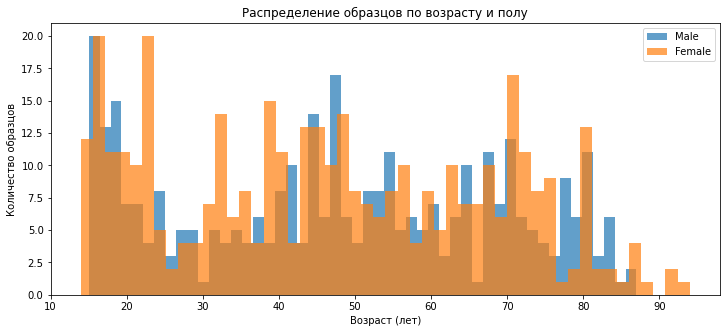

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (12,5))

axes.hist(descriptions[descriptions['sex'] == 'Male']['age'].sort_values(),
         bins = 50,
         alpha=0.7,
         label = 'Male'
        )
axes.hist(descriptions[descriptions['sex'] == 'Female']['age'].sort_values(),
         bins = 50,
         alpha=0.7,
         label = 'Female'
        )
plt.title('Распределение образцов по возрасту и полу')
axes.set_ylabel('Количество образцов')
axes.set_xlabel('Возраст (лет)')
plt.legend()
plt.show()

## Предобработка дополнительных описаний образцов

In [ ]:
additional_desriptions = pd.read_excel(path_main_dir+'\\GSE87571_additional_sample_chararcteristics.xlsx',
                                      )

C:\Users\IvanovNikita\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
additional_desriptions.columns = additional_desriptions.columns.str.split('characteristics:').str[1]

In [ ]:
additional_desriptions = additional_desriptions.join(descriptions[['Sample_geo_accession']], how = 'left')

In [ ]:
additional_desriptions['Sample_geo_accession'] = additional_desriptions.iloc[:, 0]

In [ ]:
additional_desriptions  = additional_desriptions.set_index('Sample_geo_accession', drop = True)

In [ ]:
additional_desriptions = additional_desriptions\
    .join(descriptions[['Sample_geo_accession']].reset_index().set_index('Sample_geo_accession'))

In [ ]:
additional_desriptions = additional_desriptions.set_index('index', drop = True)
additional_desriptions

,NaN,year_of_collection,smoke,rs28403969:1999006:G:A,rs142891527:2180528:G:A,rs75126985:6425349:C:T,rs1497856:74289939:C:G,rs12741890:81645181:C:T,rs76624861:85416840:C:T,rs12133641:154428283:A:G,...,Sample_Group,CD8T,CD4T,NK,Bcell,Mono,Gran,KA,Slide,chip:ass
index,,,,,,,,,,,,,,,,,,,,,
X1,GSM2333901,2006,0.0,0.007,0.000,0.0,1.000,0.0,0.000,1.0,...,2013,0.000000,0.100050,0.103269,0.015374,0.051578,0.728901,KA06,9370847096,7.0
X2,GSM2333902,2006,0.0,0.007,0.000,0.0,2.000,0.0,0.000,0.0,...,2013,0.007585,0.219594,0.097459,0.036715,0.094437,0.553426,KA06,9376538120,7.0
X3,GSM2333903,2006,0.0,0.660,0.000,0.0,1.000,0.0,0.000,0.0,...,2012,0.000000,0.018278,0.005066,0.035204,0.092227,0.827294,KA06,7766148053,7.0
X4,GSM2333904,2006,0.0,0.387,0.000,1.0,1.000,0.0,0.059,1.0,...,2012,0.024722,0.179235,0.152868,0.020081,0.113306,0.496979,KA06,7766148077,7.0
X5,GSM2333905,2006,0.0,0.003,0.000,0.0,1.000,1.0,0.000,0.0,...,2013,0.012076,0.208174,0.068129,0.047263,0.087617,0.581739,KA06,9370847096,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X728,GSM2334631,2009,0.0,0.000,0.000,0.0,1.000,0.0,0.000,0.0,...,2012,0.112239,0.238704,0.086998,0.087370,0.072453,0.430909,KA09,7766148080,3.0
X729,GSM2334632,2009,0.0,0.000,0.000,0.0,0.000,1.0,0.121,0.0,...,2012,0.130784,0.234445,0.091153,0.076919,0.067728,0.426284,KA09,7766148080,3.0
X730,GSM2334633,2009,2.0,0.000,0.005,0.0,2.000,0.0,0.004,0.0,...,2012,0.122360,0.154988,0.032996,0.065739,0.101473,0.547858,KA09,7766148084,4.0


In [ ]:
additional_desriptions.to_csv(path_main_dir+"\\GSE87571_preprocessed\\additional_desriptions.csv")

## Загрузка описаний сайтов метилирования

# New Section

In [ ]:
sites_descriptions = pd.read_csv(path_main_dir+'\\GPL13534-tbl-1.txt', sep = '	')

C:\Users\IvanovNikita\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11,14,15,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
sites_descriptions.columns = ['ID',
                              'Name',
                              'AddressA_ID',
                              'AlleleA_ProbeSeq',
                              'AddressB_ID',
                              'AlleleB_ProbeSeq',
                              'Infinium_Design_Type',
                              'Next_Base',
                              'Color_Channel',
                              'Forward_Sequence',
                              'Genome_Build',
                              'CHR',
                              'MAPINFO',
                              'SourceSeq',
                              'Chromosome_36',
                              'Coordinate_36',
                              'Strand',
                              'Probe_SNPs',
                              'Probe_SNPs_10',
                              'Random_Loci',
                              'Methyl27_Loci',
                              'UCSC_RefGene_Name',
                              'UCSC_RefGene_Accession',
                              'UCSC_RefGene_Group',
                              'UCSC_CpG_Islands_Name',
                              'Relation_to_UCSC_CpG_Island',
                              'Phantom',
                              'DMR',
                              'Enhancer',
                              'HMM_Island',
                              'Regulatory_Feature_Name',
                              'Regulatory_Feature_Group',
                              'DHS',
                              'RANGE_START',
                              'RANGE_END',
                              'RANGE_GB',
                              'SPOT_ID']
sites_descriptions

,ID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,...,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,RANGE_START,RANGE_END,RANGE_GB,SPOT_ID
0,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,31717405.0,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,A,Red,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,...,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN,9363356.0,9363479.0,NC_000024.9,NaN
1,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,NaN,NaN,II,NaN,NaN,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,...,NaN,NaN,NaN,NaN,NaN,NaN,25314171.0,25314294.0,NC_000024.9,NaN
2,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,NaN,NaN,II,NaN,NaN,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,...,NaN,NaN,NaN,NaN,NaN,NaN,22741795.0,22741918.0,NC_000024.9,NaN
3,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,NaN,NaN,II,NaN,NaN,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,...,NaN,NaN,NaN,NaN,NaN,NaN,21664296.0,21664419.0,NC_000024.9,NaN
4,cg00212031,cg00212031,29674443,CCCAATTAACCACAAAAACTAAACAAATTATACAATCAAAAAAACA...,38703326.0,CCCAATTAACCGCAAAAACTAAACAAATTATACGATCGAAAAAACG...,I,T,Red,CCATTGGCCCGCCCCAGTTGGCCGCAGGGACTGAGCAAGTTATGCG...,...,NaN,NaN,Y:19697854-19699393,NaN,NaN,NaN,21239348.0,21239471.0,NC_000024.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485571,rs7746156,rs7746156,33622366,TACCAACCAATACTCAAAATAACCCATACTAATCTTCCTATTCTTC...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs7746156
485572,rs1945975,rs1945975,23614475,CCACTTCTCTTTCCTCACCTACTTTCATTTAATTTAATACTTACCT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs1945975
485573,rs966367,rs966367,16795360,ATAACTCCTTTAACTTTAAACACACATCTCTACACACAACCACATA...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs966367
485574,rs877309,rs877309,54760445,CCCCAACCCAAAACCTCTATAATTCACAAAACACAAATTCACACTT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs877309


In [ ]:
sites_descriptions = sites_descriptions.set_index('ID', drop = True)

In [ ]:
sites_descriptions.dtypes

ID                              object
Name                            object
AddressA_ID                      int64
AlleleA_ProbeSeq                object
AddressB_ID                    float64
AlleleB_ProbeSeq                object
Infinium_Design_Type            object
Next_Base                       object
Color_Channel                   object
Forward_Sequence                object
Genome_Build                   float64
CHR                             object
MAPINFO                        float64
SourceSeq                       object
Chromosome_36                   object
Coordinate_36                   object
Strand                          object
Probe_SNPs                      object
Probe_SNPs_10                   object
Random_Loci                     object
Methyl27_Loci                   object
UCSC_RefGene_Name               object
UCSC_RefGene_Accession          object
UCSC_RefGene_Group              object
UCSC_CpG_Islands_Name           object
Relation_to_UCSC_CpG_Isla

In [ ]:
sites_descriptions['UCSC_RefGene_Name'].value_counts()

PTPRN2;PTPRN2;PTPRN2       1288
MAD1L1;MAD1L1;MAD1L1        733
PRDM16;PRDM16               623
TNXB                        514
DIP2C                       482
                           ... 
MIR657;AATK                   1
DDHD2;DDHD2                   1
ANKS1B;FAM71C                 1
SNORD114-11;SNORD114-10       1
KRT26;KRT26                   1
Name: UCSC_RefGene_Name, Length: 42438, dtype: int64

С каждым сайтом может быть ассоциировано несколько генов из-за альтернативного сплайсинга.
Для целей анализа добавим столбец с  самым часто встречающиймся геном для каждого сайта.

In [ ]:
def most_common_element(list_genes):
    return max(set(list_genes), key = list_genes.count)

In [ ]:
sites_with_genes = sites_descriptions[['UCSC_RefGene_Name']].dropna()

In [ ]:
sites_with_genes.shape

(365599, 1)

In [ ]:
sites_with_genes['Most_Common_Gene']\
    = [most_common_element(x.split(';')) for x in sites_with_genes['UCSC_RefGene_Name']]

In [ ]:
sites_descriptions = sites_descriptions.join(sites_with_genes[['Most_Common_Gene']], how = 'outer')

In [ ]:
sites_descriptions['Most_Common_Gene'].value_counts()

PTPRN2       1299
MAD1L1        733
PRDM16        640
TNXB          573
DIP2C         490
             ... 
PSMC5           1
PPP3R2          1
OR13F1          1
KRTAP19-7       1
MRPL2           1
Name: Most_Common_Gene, Length: 20282, dtype: int64

In [ ]:
sites_descriptions.to_csv(path_main_dir+"\\GSE87571_preprocessed\\descriptions_sites.csv")

In [ ]:
sites_descriptions[sites_descriptions['Most_Common_Gene'].isna() == False].index

,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,...,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,RANGE_START,RANGE_END,RANGE_GB,SPOT_ID,Most_Common_Gene
ID,,,,,,,,,,,,,,,,,,,,,
cg00000029,cg00000029,14782418,AACTATACTAACRAAAAAATATCCAAAAAACACTAACRTATAAAAA...,NaN,NaN,II,NaN,NaN,TTTTTTAGATAAGGATATCCAGGCGATGAGGAAGTTTTACTTCTGG...,37.0,...,NaN,NaN,16:53467838-53469685,Promoter_Associated,True,53468112.0,53468235.0,NC_000016.9,NaN,RBL2
cg00000108,cg00000108,12709357,ATACAATAAAACAAACCTAAAATAATCCTAACTCCRCTATCATCCT...,NaN,NaN,II,NaN,NaN,TCCATTTTGAAGGAAAAAAATGAAGGCTCTGAAAGTGTAAATCGCT...,37.0,...,NaN,NaN,NaN,NaN,NaN,37459206.0,37459329.0,NC_000003.11,NaN,C3orf35
cg00000109,cg00000109,59755374,CAATACTAACAAACACATATACCCCCCCACAAATCTTAACTTCTAA...,NaN,NaN,II,NaN,NaN,GCCTTAGTCCTGAATGAGCCATTTCTCTAAGAAGTCCTGGCTTCTT...,37.0,...,NaN,NaN,NaN,NaN,NaN,171916037.0,171916160.0,NC_000003.11,NaN,FNDC3B
cg00000236,cg00000236,12649348,TATAACRTCATATTAAAAAAAACRATCTAACCCACCAATTTATACA...,NaN,NaN,II,NaN,NaN,CTCAGCGACAGTGTAGCGTCATGTTAGAGGAGACGATCTGACCCAC...,37.0,...,NaN,NaN,NaN,NaN,NaN,42263294.0,42263417.0,NC_000008.10,NaN,VDAC3
cg00000289,cg00000289,18766346,ATCTACTATATTCATTTCTCCAATCTCATATCCATTTTAATATAAA...,NaN,NaN,II,NaN,NaN,CAAGTGAGCTAGCAAACACACATGCACCAATGTGCCTTTTGACAAG...,37.0,...,NaN,NaN,NaN,NaN,NaN,69341139.0,69341262.0,NC_000014.8,NaN,ACTN1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.798879F,ch.X.798879F,37721346,GCACTTACAAACTATTTTAATTATTACCTCTTTTCCAAACTAAAAA...,NaN,NaN,II,NaN,NaN,AGGTGTTGTTCTAGGTTTGGAGATAGAGCAGGGAGCAAAACAGAAA...,36.0,...,NaN,NaN,NaN,NaN,NaN,48341687.0,48341810.0,NC_000023.10,NaN,FTSJ1
ch.X.881064F,ch.X.881064F,57635450,ACAACAACAAAATCCAAAATAATCACTCAAATTCCTTATAAACATA...,NaN,NaN,II,NaN,NaN,AGAAGCTAAAGATATCGATAACAGCTCGTGGCAATTATATAACATA...,36.0,...,NaN,NaN,NaN,NaN,NaN,53673061.0,53673184.0,NC_000023.10,NaN,HUWE1
ch.X.881546R,ch.X.881546R,32720319,TTCCAAATTTCCTATAAATCATAAATCCATTTATAATCAAATTTCC...,NaN,NaN,II,NaN,NaN,GCCGCTGCACTCCAGCCTAGGTGACAGAATGAGACCCTGTTTCTTT...,36.0,...,NaN,NaN,NaN,NaN,NaN,53691005.0,53691128.0,NC_000023.10,NaN,HUWE1
